<a target="_blank" href="https://colab.research.google.com/drive/1umIpFVnuYQxKad7cIh5knMXA7MZJBfSM?usp=sharing">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# Optimizing EDM and LA to Enhance Equity for Underrepresented Students

## 1. Setup Environment

### 1.1. Mount Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

# Verify current working directory
!pwd

Mounted at /content/drive
/content


In [2]:
%cd /content/drive/MyDrive/Colab\ Notebooks/Optimizing-EDM-and-LA-to-Enhance-Equity-for-Underrepresented-Students

/content/drive/MyDrive/Colab Notebooks/Optimizing-EDM-and-LA-to-Enhance-Equity-for-Underrepresented-Students


### 1.2. Git Configuration


In [3]:
# Change directory to your project folder
# %cd /content/drive/MyDrive/Colab\ Notebooks/Optimizing-EDM-and-LA-to-Enhance-Equity-for-Underrepresented-Students

# Clone the repository
# !git clone https://github.com/MarwaQabeel/Optimizing-EDM-and-LA-to-Enhance-Equity-for-Underrepresented-Students.git

# Configure GitHub user details
# !git config --global user.name MarwaQabeel
# !git config --global user.email mqabeel3@gatech.edu

# Store Git credentials
# !git config --global credential.helper store

# Add and commit changes
# !git add .
# !git commit -m "add notebook"

# Push changes to GitHub
# !git push https://github.com/MarwaQabeel/Optimizing-EDM-and-LA-to-Enhance-Equity-for-Underrepresented-Students.git master

### 1.3. Install Required Libraries


In [4]:
!pip install fairlearn category_encoders shap lime scikit-learn aif360 --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.3/232.3 kB 18.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.7/259.7 kB 20.5 MB/s eta 0:00:00
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=342f6aa7cae296e1c3920b2ab39a0ba0e1be932f328a30dd25a094ee9e4c4ef4
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [5]:
pip install 'aif360[inFairness]'

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.8/45.8 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.4/239.4 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 865.6/865.6 kB 18.7 MB/s eta 0:00:00


## 2. Import Libraries

In [6]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier, RandomForestClassifier
from sklearn.metrics import (classification_report, confusion_matrix, roc_curve, auc,
                             accuracy_score, precision_score, recall_score, f1_score)

from fairlearn.metrics import MetricFrame, demographic_parity_difference, equalized_odds_difference, false_positive_rate, false_negative_rate
from fairlearn.reductions import ExponentiatedGradient, DemographicParity, EqualizedOdds, GridSearch

from category_encoders import TargetEncoder

import shap
from lime.lime_tabular import LimeTabularExplainer

from aif360.algorithms.inprocessing import PrejudiceRemover, MetaFairClassifier
from aif360.datasets import StandardDataset

from sklearn.inspection import PartialDependenceDisplay

/usr/local/lib/python3.10/dist-packages/inFairness/utils/ndcg.py:37: FutureWarning: We've integrated functorch into PyTorch. As the final step of the integration, `functorch.vmap` is deprecated as of PyTorch 2.0 and will be deleted in a future version of PyTorch >= 2.3. Please use `torch.vmap` instead; see the PyTorch 2.0 release notes and/or the `torch.func` migration guide for more details https://pytorch.org/docs/main/func.migrating.html
  vect_normalized_discounted_cumulative_gain = vmap(
/usr/local/lib/python3.10/dist-packages/inFairness/utils/ndcg.py:48: FutureWarning: We've integrated functorch into PyTorch. As the final step of the integration, `functorch.vmap` is deprecated as of PyTorch 2.0 and will be deleted in a future version of PyTorch >= 2.3. Please use `torch.vmap` instead; see the PyTorch 2.0 release notes and/or the `torch.func` migration guide for more details https://pytorch.org/docs/main/func.migrating.html
  monte_carlo_vect_ndcg = vmap(vect_normalized_discounted

In [7]:
import warnings
warnings.filterwarnings('ignore')

## 3. Data Preparation and Loading
### 3.1. Load Dataset


In [8]:
# Load the original dataset
data = pd.read_csv("data/student_dropout.csv")

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

print(data.shape)
data.head()

(4424, 35)


,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nationality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,10,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,4,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,10,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,4,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,10,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


### 3.2. Data Mapping for Visualization


In [9]:
# Create a copy for mapping
data_mapped = data.copy()

# Define mappings
marital_status_mapping = {
    1: 'Single', 2: 'Married', 3: 'Widower',
    4: 'Divorced', 5: 'Facto union', 6: 'Legally separated'
}
gender_mapping = {1: 'Male', 0: 'Female'}
yes_no_mapping = {1: 'Yes', 0: 'No'}

# Apply mappings
data_mapped['Marital status'] = data_mapped['Marital status'].replace(marital_status_mapping)
data_mapped['Gender'] = data_mapped['Gender'].replace(gender_mapping)
for col in ['Displaced', 'Educational special needs', 'Debtor', 'Tuition fees up to date', 'Scholarship holder', 'International']:
    data_mapped[col] = data_mapped[col].replace(yes_no_mapping)

## 4. Exploratory Data Analysis (EDA)

### 4.1. Perform EDA

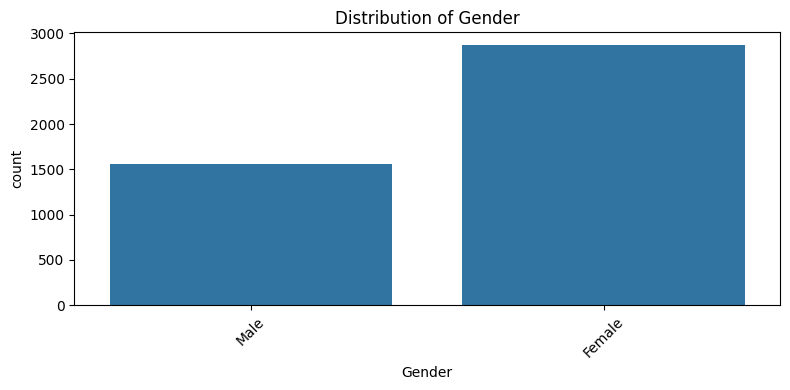

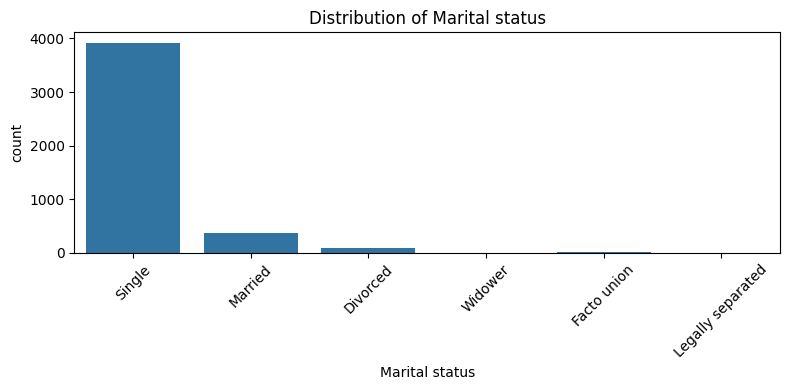

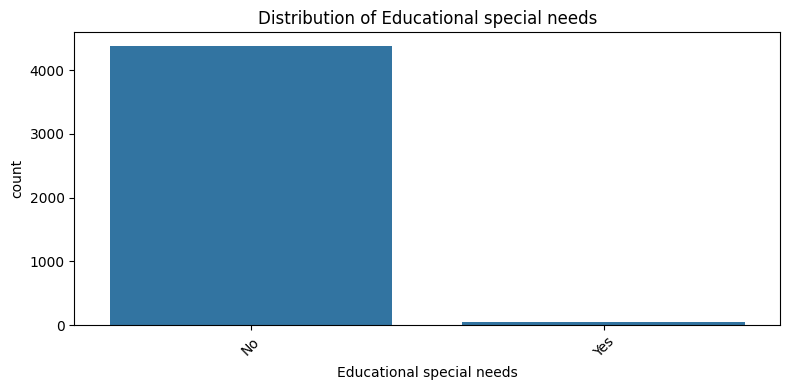

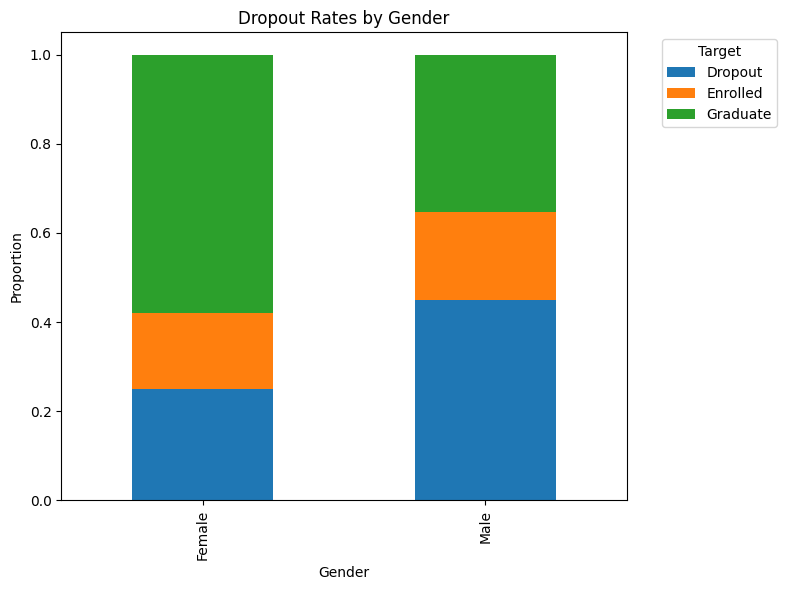

In [10]:
def perform_eda(mapped_data):
    """Perform EDA using the mapped dataset."""
    # Distribution of categorical variables
    for col in ['Gender', 'Marital status', 'Educational special needs']:
        plt.figure(figsize=(8, 4))
        sns.countplot(x=col, data=mapped_data)
        plt.title(f'Distribution of {col}')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

    # Visualize dropout rates by gender
    dropout_by_gender = mapped_data.groupby('Gender')['Target'].value_counts(normalize=True).unstack()
    dropout_by_gender.plot(kind='bar', stacked=True, figsize=(8, 6))
    plt.title('Dropout Rates by Gender')
    plt.ylabel('Proportion')
    plt.legend(title='Target', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

perform_eda(data_mapped)

## 5. Data Preparation for Model Training

### 5.1. Define Features and Target

In [11]:
# Define features and target
X = data.drop(['Target'], axis=1)
y = (data['Target'] == 'Dropout').astype(int)

### 5.2. Split the Data

In [12]:
# Split the data with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

### 5.3. Preprocessing Pipeline


In [13]:
# Identify numerical and categorical columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

# Define ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ]
)

## 6. Model Training and Evaluation

### 6.1. Define and Train Pipeline

In [14]:
# Define the pipeline with preprocessing and classifier
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(solver='liblinear', random_state=42))
])

# Fit the model
model_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Marital status',
                                                   'Application mode',
                                                   'Application order',
                                                   'Course',
                                                   'Daytime/evening attendance',
                                                   'Previous qualification',
                                                   'Nationality',
                                                   "Mother's qualification",
                                                   "Father's qualification",
                                                   "Mother's occupation",
                                                   "Father's occupation",
                                                   'Displaced',
                                                   'Educational special needs',
                                                   'Debt...
                                                   'Curricular units 1st sem '
                                                   '(without evaluations)',
                                                   'Curricular units 2nd sem '
                                                   '(credited)',
                                                   'Curricular units 2nd sem '
                                                   '(enrolled)',
                                                   'Curricular units 2nd sem '
                                                   '(evaluations)',
                                                   'Curricular units 2nd sem '
                                                   '(approved)',
                                                   'Curricular units 2nd sem '
                                                   '(grade)', ...]),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  [])])),
                ('classifier',
                 LogisticRegression(random_state=42, solver='liblinear'))])

### 6.2. Make Predictions and Evaluate


In [15]:
# Predict on the test set
y_pred = model_pipeline.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.95      0.91       601
           1       0.87      0.73      0.79       284

    accuracy                           0.88       885
   macro avg       0.88      0.84      0.85       885
weighted avg       0.88      0.88      0.88       885

Confusion Matrix:
[[571  30]
 [ 77 207]]


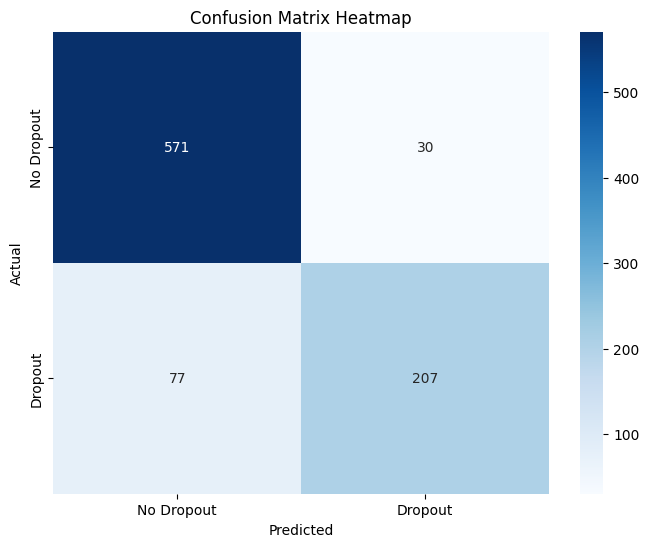

In [16]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
labels = ['No Dropout', 'Dropout']  # Adjust labels based on your target classes

# Create a heatmap
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix Heatmap')
plt.savefig('confusion_matrix_heatmap.png')  # Save the figure for inclusion in LaTeX
plt.show()

## 7. Fairness Analysis

### 7.1. Define Sensitive Feature

In [17]:
# Define the sensitive feature
sensitive_feature = X_test['Gender']

### 7.2. Compute Fairness Metrics


In [18]:
def compute_fairness_metrics(y_true, y_pred, sensitive_features):
    metric_frame = MetricFrame(
        metrics={
            'accuracy': accuracy_score,
            'precision': precision_score,
            'recall': recall_score,
            'f1_score': f1_score
        },
        y_true=y_true,
        y_pred=y_pred,
        sensitive_features=sensitive_features
    )

    # Calculate fairness differences
    dp_diff = demographic_parity_difference(y_true, y_pred, sensitive_features=sensitive_features)
    eo_diff = equalized_odds_difference(y_true, y_pred, sensitive_features=sensitive_features)

    print("Fairness Metrics by Group:")
    print(metric_frame.by_group)
    print(f"\nDemographic Parity Difference: {dp_diff:.2f}")
    print(f"Equalized Odds Difference: {eo_diff:.2f}")

compute_fairness_metrics(y_test, y_pred, sensitive_feature)

Fairness Metrics by Group:
        accuracy  precision    recall  f1_score
Gender                                         
0       0.900709   0.879630  0.688406  0.772358
1       0.841121   0.868217  0.767123  0.814545

Demographic Parity Difference: 0.21
Equalized Odds Difference: 0.08


### 7.3. Fairness-Aware Model using Exponentiated Gradient


In [19]:
# Initialize the estimator
estimator = LogisticRegression(solver='liblinear', random_state=42)

# Define the mitigator with Demographic Parity constraint
mitigator = ExponentiatedGradient(estimator, constraints=DemographicParity())

# Fit the mitigator
mitigator.fit(X_train, y_train, sensitive_features=X_train['Gender'])

# Predict and evaluate fairness-aware model
y_pred_fair = mitigator.predict(X_test)
compute_fairness_metrics(y_test, y_pred_fair, sensitive_feature)

Fairness Metrics by Group:
        accuracy  precision    recall  f1_score
Gender                                         
0       0.895390   0.780142  0.797101  0.788530
1       0.791277   0.943820  0.575342  0.714894

Demographic Parity Difference: 0.03
Equalized Odds Difference: 0.22


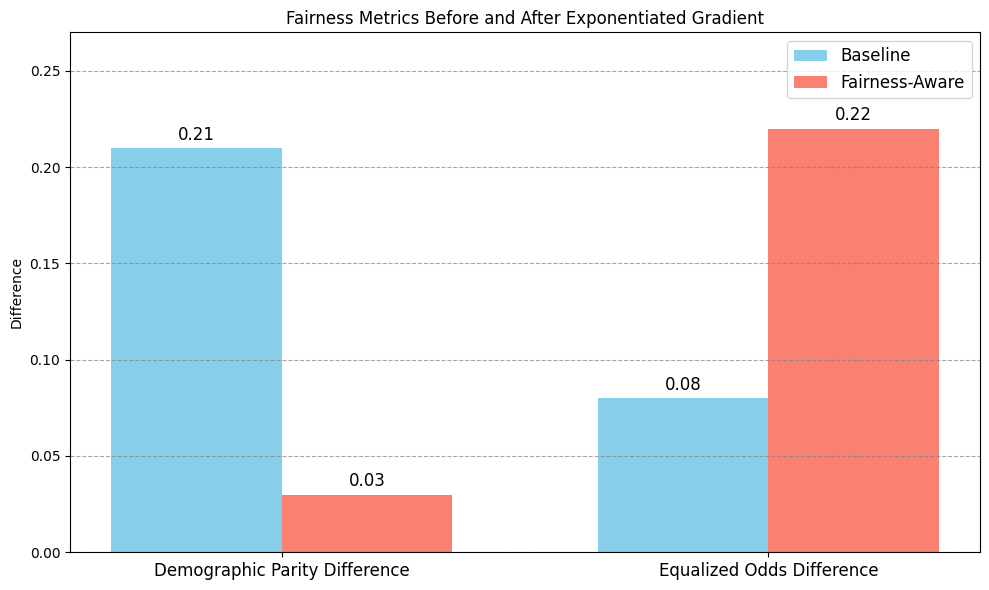

In [20]:
import matplotlib.pyplot as plt
import numpy as np

# Data Provided
metrics = ['Demographic Parity Difference', 'Equalized Odds Difference']
baseline_values = [0.21, 0.08]
fairness_aware_values = [0.03, 0.22]

# Positions of the bars on the x-axis
x = np.arange(len(metrics))  # [0, 1]
width = 0.35  # Width of the bars

# Create the bar chart
fig, ax = plt.subplots(figsize=(10, 6))

# Bars for Baseline Model
rects1 = ax.bar(x - width/2, baseline_values, width, label='Baseline', color='skyblue')

# Bars for Fairness-Aware Model
rects2 = ax.bar(x + width/2, fairness_aware_values, width, label='Fairness-Aware', color='salmon')

# Add labels, title, and custom x-axis tick labels
ax.set_ylabel('Difference')
ax.set_title('Fairness Metrics Before and After Exponentiated Gradient')
ax.set_xticks(x)
ax.set_xticklabels(metrics, fontsize=12)
ax.set_ylim(0, max(fairness_aware_values) + 0.05)  # Adjust y-axis limit for better visibility
ax.legend(fontsize=12)

# Function to add labels on top of each bar
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom',
                    fontsize=12)

# Apply the autolabel function to both sets of bars
autolabel(rects1)
autolabel(rects2)

# Add grid lines for better readability
ax.yaxis.grid(True, linestyle='--', which='major', color='grey', alpha=0.7)

# Adjust layout to prevent clipping of labels
fig.tight_layout()

# Save the figure as a high-resolution PNG file
plt.savefig('fairness_metrics_comparison.png', dpi=300)

# Display the plot
plt.show()


## 8. Model Performance Visualization

### 8.1. ROC Curves

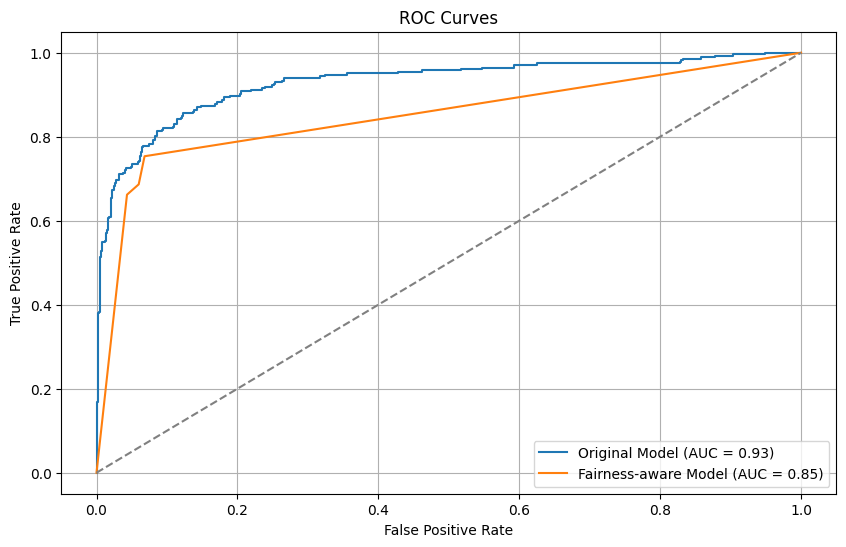

In [21]:
def plot_roc_curve(model, X_test, y_test, model_name, is_fair_model=False):
    if is_fair_model:
        # For fairness-aware model, use the _pmf_predict method to get probabilities
        y_probs_fair = model._pmf_predict(X_test)[:, 1]  # Probability for class 1
        fpr, tpr, _ = roc_curve(y_test, y_probs_fair)
        roc_auc = auc(fpr, tpr)
    else:
        # For the standard model, use predict_proba directly
        y_probs = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_probs)
        roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

# Plot ROC curves for both models
plt.figure(figsize=(10, 6))
plot_roc_curve(model_pipeline, X_test, y_test, "Original Model", is_fair_model=False)
plot_roc_curve(mitigator, X_test, y_test, "Fairness-aware Model", is_fair_model=True)
plt.plot([0, 1], [0, 1], 'k--', color='gray')
plt.title('ROC Curves')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.show()

## 9. Feature Engineering

### 9.1. Polynomial Features

In [22]:
# Generate interaction features
interaction = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_train_interactions = interaction.fit_transform(X_train[numerical_cols])
X_test_interactions = interaction.transform(X_test[numerical_cols])

### 9.2. Target Encoding for Categorical Variables


In [23]:
# Initialize Target Encoder
encoder = TargetEncoder(cols=categorical_cols)

# Fit and transform the training and test sets
X_train_encoded = encoder.fit_transform(X_train, y_train)
X_test_encoded = encoder.transform(X_test)

## 10. Advanced Model Training

### 10.1. Hyperparameter Tuning with GridSearchCV

In [24]:
# Define parameter grid
param_grid = {
    'classifier__C': [0.01, 0.1, 1, 10],
    'classifier__penalty': ['l2']
}

# Initialize GridSearchCV
grid_search = GridSearchCV(
    model_pipeline, param_grid, scoring='accuracy', cv=5, n_jobs=-1
)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Best model
best_model = grid_search.best_estimator_
print("Best Model Parameters:", grid_search.best_params_)

Best Model Parameters: {'classifier__C': 0.1, 'classifier__penalty': 'l2'}


### 10.2. Stacking Classifier

In [25]:
# Define the preprocessing pipeline
preprocessor_stacked = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Scale the training and test sets
X_train_scaled = preprocessor_stacked.fit_transform(X_train)
X_test_scaled = preprocessor_stacked.transform(X_test)

# Define base estimators
estimators = [
    ('lr', LogisticRegression(solver='saga', max_iter=1000, random_state=42)),
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42))
]

# Define the stacking model with Logistic Regression as the final estimator
stacked_model = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression(solver='saga', max_iter=1000, random_state=42)
)

# Fit the stacked model
stacked_model.fit(X_train_scaled, y_train)

# Predict and evaluate the stacked model
y_pred_stacked = stacked_model.predict(X_test_scaled)

print("Classification Report for Stacked Model:")
print(classification_report(y_test, y_pred_stacked))

print("Confusion Matrix for Stacked Model:")
print(confusion_matrix(y_test, y_pred_stacked))

Classification Report for Stacked Model:
              precision    recall  f1-score   support

           0       0.89      0.95      0.92       601
           1       0.87      0.75      0.81       284

    accuracy                           0.88       885
   macro avg       0.88      0.85      0.86       885
weighted avg       0.88      0.88      0.88       885

Confusion Matrix for Stacked Model:
[[569  32]
 [ 70 214]]


## 11. Model Interpretation
### 11.1. SHAP Analysis

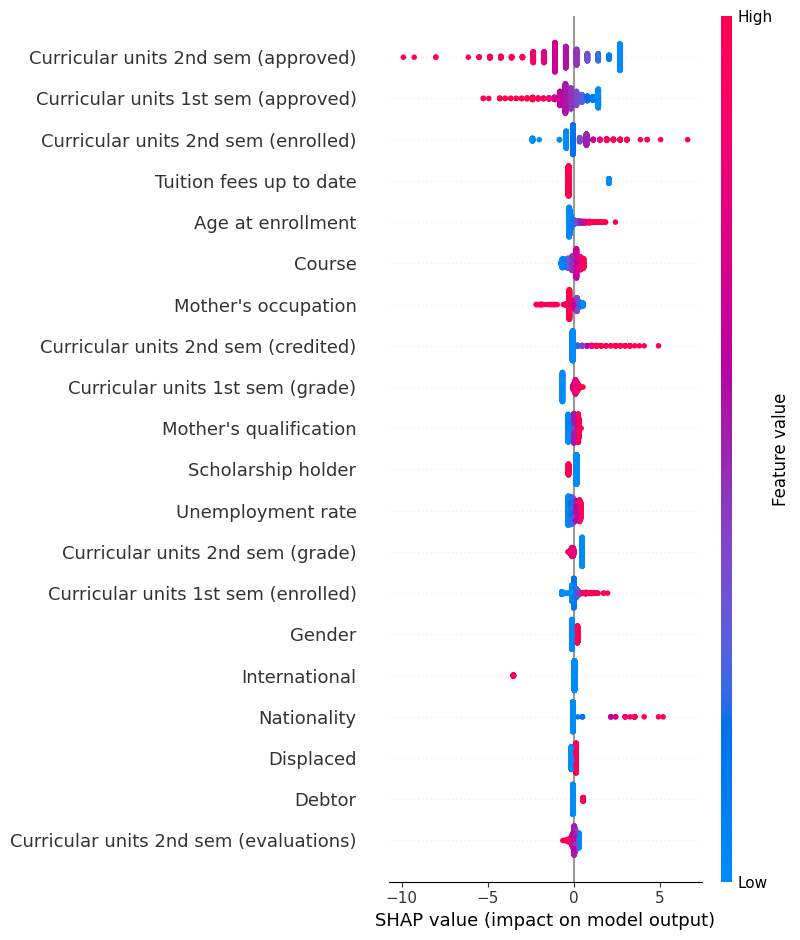

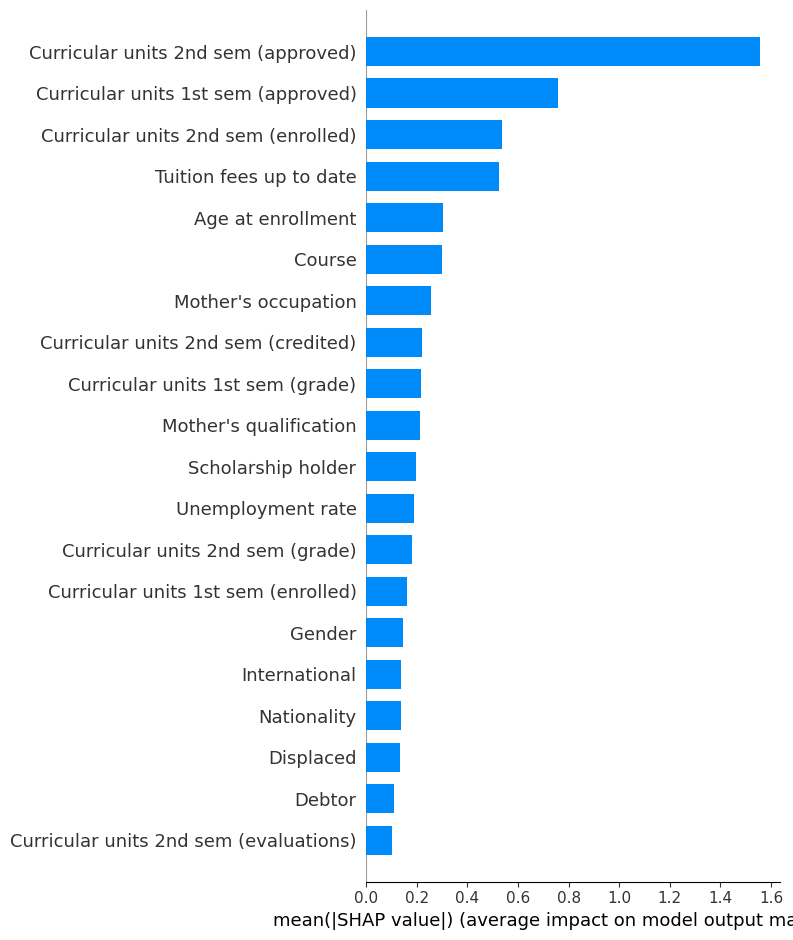

In [26]:
# Initialize SHAP explainer
explainer = shap.Explainer(model_pipeline.named_steps['classifier'], X_train_scaled)
shap_values = explainer(X_test_scaled)

# Enhanced SHAP Summary Plot
plt.figure(figsize=(14, 8))
shap.summary_plot(shap_values, X_test_scaled, feature_names=X_test.columns, show=True)

# Enhanced SHAP Bar Plot for Feature Importance
plt.figure(figsize=(12, 6))
shap.summary_plot(shap_values, X_test_scaled, plot_type="bar", feature_names=X_test.columns, show=True)

# Add Titles and Labels
# plt.title("SHAP Feature Importance - Enhanced", fontsize=16)
# plt.xlabel("SHAP Value (Impact on Model Output)", fontsize=14)
# plt.ylabel("Features", fontsize=14)
# plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

### 11.2. SHAP Dependence Plot


<Figure size 1200x800 with 0 Axes>

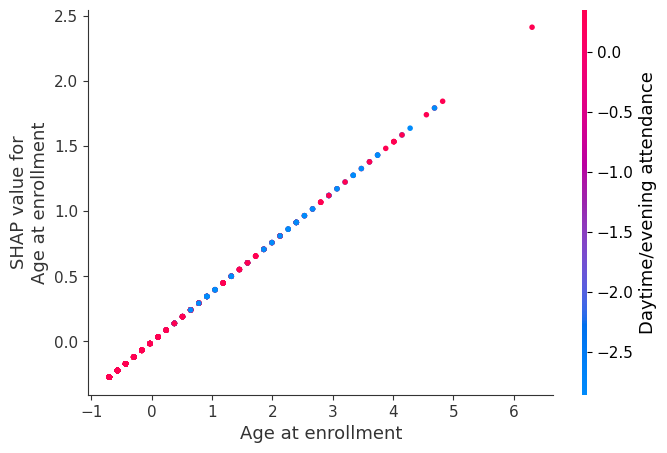

In [27]:
feature_name = 'Age at enrollment'


if feature_name in X_test.columns:
    # Create the SHAP dependence plot with combined grid and graph
    plt.figure(figsize=(12, 8))
    # plt.title(f"SHAP Dependence Plot: Age at enrollment")
    shap.dependence_plot(
        ind=feature_name,               # Use the feature name
        shap_values=shap_values.values,  # SHAP values
        features=X_test_scaled,         # Use scaled test data
        feature_names=X_test.columns    # Feature names
    )

    # Customize the grid and title
    # plt.grid(True, linestyle='--', alpha=0.6)  # Add grid to the plot
    # plt.xlabel(f"{feature_name}", fontsize=14)
    # plt.ylabel("SHAP Value", fontsize=14)
    # plt.tight_layout()  # Adjust layout to prevent overlap
    plt.show();
# else:
#     print(f"Feature '{feature_name}' not found in the dataset.")


### 11.3. LIME Explanation


In [28]:
from lime.lime_tabular import LimeTabularExplainer

# Define a custom prediction function that includes preprocessing
def predict_proba_with_pipeline(X_raw):
    """Predict probabilities using the model pipeline, including preprocessing."""
    # Convert input to a DataFrame with column names
    X_raw_df = pd.DataFrame(X_raw, columns=X_train.columns)
    X_preprocessed = preprocessor.transform(X_raw_df)  # Preprocess the raw input
    return model_pipeline.named_steps['classifier'].predict_proba(X_preprocessed)

# Initialize the LIME explainer with raw training data
explainer_lime = LimeTabularExplainer(
    X_train.to_numpy(),  # Use NumPy array of the training data
    feature_names=X_train.columns.tolist(),  # Ensure feature names are included
    class_names=['No Dropout', 'Dropout'],  # Class names
    discretize_continuous=True
)

# Select an instance from the raw X_test to explain
instance = X_test.iloc[0].to_numpy().reshape(1, -1)  # Convert to NumPy array for compatibility

# Use LIME to explain the prediction
exp = explainer_lime.explain_instance(
    instance.flatten(),  # Pass the instance as a flat array
    predict_proba_with_pipeline,  # Use the prediction function
    num_features=10  # Number of features to include in the explanation
)

# Display the explanation
exp.show_in_notebook()




## 12. Additional Fairness Techniques

### 12.1. Adversarial Perturbation Test

In [29]:
def adversarial_perturbation_test(model, X_test, y_test, sensitive_feature):
    """
    Apply adversarial perturbation to a sensitive feature and observe the impact on predictions.
    """
    # Make a copy of the test set
    X_perturbed = X_test.copy()

    # Flip the values of the sensitive feature (e.g., change 'Male' to 'Female')
    if X_perturbed[sensitive_feature].dtype == 'object':
        X_perturbed[sensitive_feature] = X_perturbed[sensitive_feature].apply(
            lambda x: 'Female' if x == 'Male' else 'Male'
        )
    else:
        X_perturbed[sensitive_feature] = 1 - X_perturbed[sensitive_feature]  # For binary numerical sensitive features

    # Get predictions for both original and perturbed datasets
    y_pred_original = model.predict(X_test)
    y_pred_perturbed = model.predict(X_perturbed)

    # Evaluate the impact on accuracy
    accuracy_original = accuracy_score(y_test, y_pred_original)
    accuracy_perturbed = accuracy_score(y_test, y_pred_perturbed)

    print(f"Accuracy on Original Data: {accuracy_original:.4f}")
    print(f"Accuracy on Perturbed Data: {accuracy_perturbed:.4f}")

    # Measure differences in predictions
    prediction_changes = np.mean(y_pred_original != y_pred_perturbed)
    print(f"Percentage of Predictions Changed: {prediction_changes * 100:.2f}%")

    # Confusion matrix on perturbed data
    print("\nConfusion Matrix on Perturbed Data:")
    print(confusion_matrix(y_test, y_pred_perturbed))

    print("\nClassification Report on Perturbed Data:")
    print(classification_report(y_test, y_pred_perturbed))

# Run the adversarial test on the original model
adversarial_perturbation_test(model_pipeline, X_test, y_test, sensitive_feature='Gender')

Accuracy on Original Data: 0.8791
Accuracy on Perturbed Data: 0.8870
Percentage of Predictions Changed: 2.60%

Confusion Matrix on Perturbed Data:
[[572  29]
 [ 71 213]]

Classification Report on Perturbed Data:
              precision    recall  f1-score   support

           0       0.89      0.95      0.92       601
           1       0.88      0.75      0.81       284

    accuracy                           0.89       885
   macro avg       0.88      0.85      0.86       885
weighted avg       0.89      0.89      0.88       885



### 12.2. AIF360 Fairness Algorithms

#### 12.2.1. Prejudice Remover

In [30]:
# Convert 'Gender' to numerical values (1 for Male, 0 for Female)
X_train['Gender'] = X_train['Gender'].replace({'Male': 1, 'Female': 0})
X_test['Gender'] = X_test['Gender'].replace({'Male': 1, 'Female': 0})

# Convert your data to an AIF360-compatible dataset
combined_train = pd.concat([X_train, y_train], axis=1)
combined_test = pd.concat([X_test, y_test], axis=1)

aif_train = StandardDataset(
    combined_train,
    label_name='Target',
    favorable_classes=[0],  # 0: No Dropout, 1: Dropout
    protected_attribute_names=['Gender'],
    privileged_classes=[[1]]  # 'Male' is privileged
)

aif_test = StandardDataset(
    combined_test,
    label_name='Target',
    favorable_classes=[0],
    protected_attribute_names=['Gender'],
    privileged_classes=[[1]]
)

# Initialize and fit Prejudice Remover
pr_model = PrejudiceRemover(eta=1.0)
pr_model.fit(aif_train)

# Make predictions
aif_predictions = pr_model.predict(aif_test)
y_pred_pr = aif_predictions.labels.ravel()

# Evaluate the model
print("Accuracy on Test Data (Prejudice Remover):", accuracy_score(y_test, y_pred_pr))
print("\nClassification Report (Prejudice Remover):")
print(classification_report(y_test, y_pred_pr))

Accuracy on Test Data (Prejudice Remover): 0.11977401129943503

Classification Report (Prejudice Remover):
              precision    recall  f1-score   support

           0       0.13      0.05      0.07       601
           1       0.12      0.26      0.16       284

    accuracy                           0.12       885
   macro avg       0.12      0.16      0.12       885
weighted avg       0.13      0.12      0.10       885



#### 12.2.2. MetaFairClassifier

In [31]:
from aif360.datasets import StandardDataset
from aif360.algorithms.inprocessing import MetaFairClassifier
from sklearn.metrics import accuracy_score, classification_report

# Debug the dataset
print("Dataset Check:")
print("Features Shape:", aif_train.features.shape)
print("Labels Shape:", aif_train.labels.shape)
print("Protected Attributes Shape:", aif_train.protected_attributes.shape)
print("Privileged Groups:", aif_train.privileged_protected_attributes)
print("Unprivileged Groups:", aif_train.unprivileged_protected_attributes)

# Initialize the MetaFairClassifier
meta_fair_model = MetaFairClassifier(tau=0.0, sensitive_attr='Gender')  # Start with tau=0.0

try:
    # Train the classifier
    meta_fair_model.fit(aif_train)
    print("MetaFairClassifier trained successfully.")
except Exception as e:
    print("Error during MetaFairClassifier training:", e)
    print("MetaFairClassifier Attributes:")
    for attr in dir(meta_fair_model):
        if not attr.startswith("_"):
            print(f"{attr}: {getattr(meta_fair_model, attr)}")

# Try predictions
try:
    aif_meta_predictions = meta_fair_model.predict(aif_test)
    y_pred_meta_fair = aif_meta_predictions.labels.ravel()

    # Evaluate the model
    print("Accuracy on Test Data (MetaFairClassifier):", accuracy_score(y_test, y_pred_meta_fair))
    print("\nClassification Report (MetaFairClassifier):")
    print(classification_report(y_test, y_pred_meta_fair))
except Exception as e:
    print("Error during MetaFairClassifier prediction:", e)


Dataset Check:
Features Shape: (3539, 34)
Labels Shape: (3539, 1)
Protected Attributes Shape: (3539, 1)
Privileged Groups: [array([1.])]
Unprivileged Groups: [array([0.])]
MetaFairClassifier trained successfully.
Accuracy on Test Data (MetaFairClassifier): 0.11751412429378531

Classification Report (MetaFairClassifier):
              precision    recall  f1-score   support

           0       0.09      0.03      0.05       601
           1       0.13      0.29      0.18       284

    accuracy                           0.12       885
   macro avg       0.11      0.16      0.11       885
weighted avg       0.10      0.12      0.09       885



In [32]:
from fairlearn.reductions import ExponentiatedGradient
from fairlearn.reductions import DemographicParity

# Define the classifier
base_model = LogisticRegression(solver='liblinear')

# Use ExponentiatedGradient with Demographic Parity constraints
mitigator = ExponentiatedGradient(base_model, constraints=DemographicParity())

# Train the model
mitigator.fit(X_train, y_train, sensitive_features=X_train['Gender'])

# Predictions
y_pred_fair = mitigator.predict(X_test)

# Evaluate the fairness-aware model
print("Accuracy on Test Data (ExponentiatedGradient):", accuracy_score(y_test, y_pred_fair))
print("\nClassification Report (ExponentiatedGradient):")
print(classification_report(y_test, y_pred_fair))


Accuracy on Test Data (ExponentiatedGradient): 0.8610169491525423

Classification Report (ExponentiatedGradient):
              precision    recall  f1-score   support

           0       0.87      0.94      0.90       601
           1       0.85      0.69      0.76       284

    accuracy                           0.86       885
   macro avg       0.86      0.82      0.83       885
weighted avg       0.86      0.86      0.86       885



### 12.3. Prediction Stability Visualization


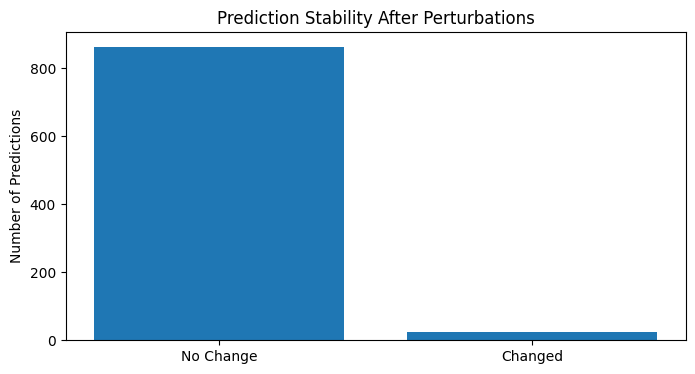

In [33]:
def plot_prediction_stability(y_pred_original, y_pred_perturbed):
    """Visualize the stability of predictions before and after perturbations."""
    changes = y_pred_original != y_pred_perturbed
    plt.figure(figsize=(8, 4))
    plt.bar(['No Change', 'Changed'], [sum(~changes), sum(changes)])
    plt.title('Prediction Stability After Perturbations')
    plt.ylabel('Number of Predictions')
    plt.show()

# Generate perturbed predictions
y_pred_original = model_pipeline.predict(X_test)
y_pred_perturbed = model_pipeline.predict(X_test.assign(Gender=1 - X_test['Gender']))

# Plot prediction stability
plot_prediction_stability(y_pred_original, y_pred_perturbed)

## 13. Partial Dependence Plots


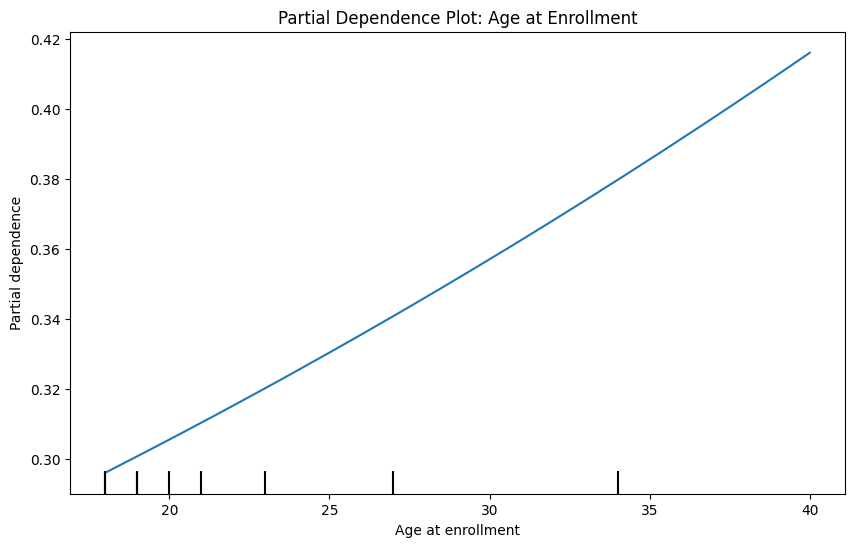

In [34]:
# Use PartialDependenceDisplay to plot the partial dependence plot
fig, ax = plt.subplots(figsize=(10, 6))
PartialDependenceDisplay.from_estimator(
    model_pipeline,
    X_train,
    features=['Age at enrollment'],
    grid_resolution=20,
    ax=ax
)
plt.title("Partial Dependence Plot: Age at Enrollment")
plt.show()

## 14. Final Fairness Metrics Evaluation


Overall Metrics:
accuracy     0.879096
precision    0.873418
recall       0.728873
f1_score     0.794626
dtype: float64

Metrics by Group:
        accuracy  precision    recall  f1_score
Gender                                         
0       0.900709   0.879630  0.688406  0.772358
1       0.841121   0.868217  0.767123  0.814545

Demographic Parity Difference: 0.21
Equalized Odds Difference: 0.08


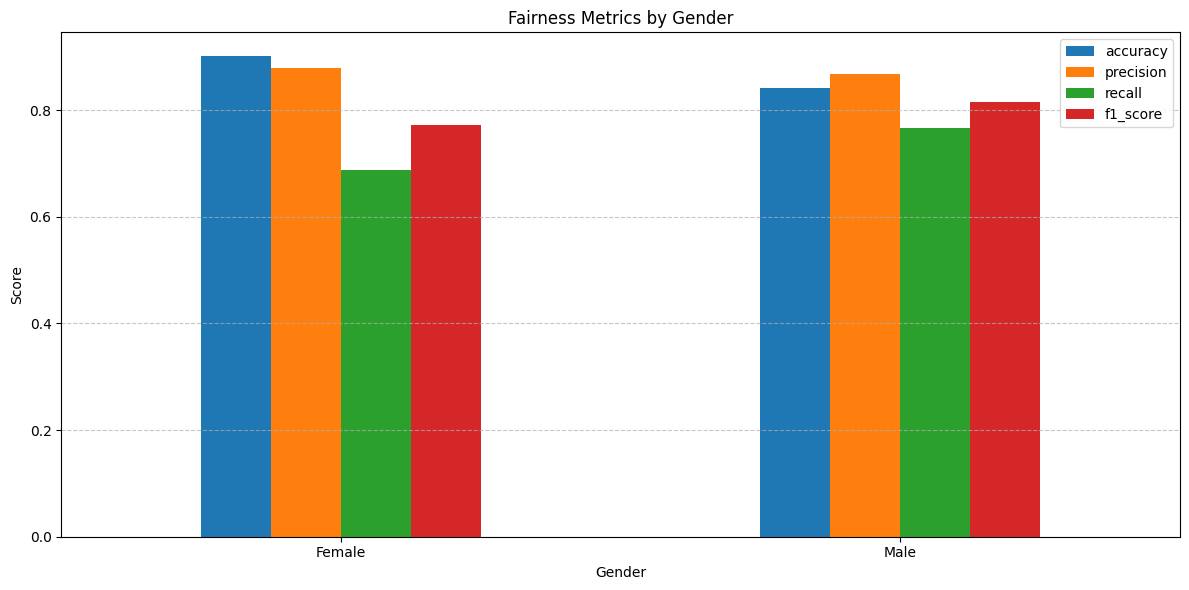

In [35]:
# Define the sensitive feature mapping
sensitive_feature_labels = {0: 'Female', 1: 'Male'}

# Compute fairness metrics using MetricFrame
metric_frame = MetricFrame(
    metrics={
        'accuracy': accuracy_score,
        'precision': precision_score,
        'recall': recall_score,
        'f1_score': f1_score
    },
    y_true=y_test,
    y_pred=y_pred,
    sensitive_features=sensitive_feature
)

# Display overall and group-specific metrics
print("Overall Metrics:")
print(metric_frame.overall)
print("\nMetrics by Group:")
print(metric_frame.by_group)

# Calculate and display fairness differences
dp_diff = demographic_parity_difference(y_test, y_pred, sensitive_features=sensitive_feature)
eo_diff = equalized_odds_difference(y_test, y_pred, sensitive_features=sensitive_feature)

print(f"\nDemographic Parity Difference: {dp_diff:.2f}")
print(f"Equalized Odds Difference: {eo_diff:.2f}")

# Visualize metrics by group with proper labels
group_metrics = metric_frame.by_group
group_metrics.index = group_metrics.index.map(sensitive_feature_labels)  # Map indices to labels

# Plot the metrics with proper labels
group_metrics.plot(kind='bar', figsize=(12, 6), title="Fairness Metrics by Gender")
plt.xlabel('Gender')  # Add x-axis label
plt.ylabel('Score')   # Add y-axis label
plt.xticks(rotation=0)  # Ensure labels are horizontal
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid for better readability
plt.tight_layout()  # Adjust layout to fit all elements
plt.show()
